# ANIME RECOMMENDER SYSTEM - EDA (EXPLORATORY DATA ANALYSIS) - ANIME

In [1]:
# basic library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
anime_df = pd.read_csv('dataset/cleaned_dataset/anime.csv')
anime_df.head()

,anime_id,title,score,rating_count,ranked,popularity,members,type,studio,synopsis,episode_count,genre,url,img
0,1,Cowboy Bebop,8.75,872410.0,38.0,43,1688684,TV,Sunrise,Crime is timeless. By the year 2071 humanity h...,26.0,"Action, Sci-Fi, Adult Cast, Space",https://myanimelist.net/anime/1/Cowboy_Bebop,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,199142.0,182.0,584,346712,Movie,Bones,Another day another bounty�such is the life of...,1.0,"Action, Sci-Fi, Adult Cast, Space",https://myanimelist.net/anime/5/Cowboy_Bebop__...,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,8.22,339167.0,323.0,246,685752,TV,Madhouse,Vash the Stampede is the man with a $$60000000...,26.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Adul...",https://myanimelist.net/anime/6/Trigun,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,7.25,42115.0,2737.0,1724,108510,TV,Sunrise,Witches are individuals with special powers li...,26.0,"Action, Drama, Mystery, Supernatural, Detective",https://myanimelist.net/anime/7/Witch_Hunter_R...,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,6.95,6308.0,4173.0,4964,14610,TV,Toei Animation,It is the dark century and the people are suff...,52.0,"Adventure, Fantasy, Supernatural, Shounen",https://myanimelist.net/anime/8/Bouken_Ou_Beet,https://cdn.myanimelist.net/images/anime/7/215...


In [3]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23765 entries, 0 to 23764
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       23765 non-null  int64  
 1   title          23765 non-null  object 
 2   score          23765 non-null  float64
 3   rating_count   23765 non-null  float64
 4   ranked         23765 non-null  float64
 5   popularity     23765 non-null  int64  
 6   members        23765 non-null  int64  
 7   type           23765 non-null  object 
 8   studio         23765 non-null  object 
 9   synopsis       23765 non-null  object 
 10  episode_count  23765 non-null  float64
 11  genre          23765 non-null  object 
 12  url            23765 non-null  object 
 13  img            23765 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 2.5+ MB


## Split comma seperated list column
some comma seperated list column were: 'Genres'

In [4]:
anime_df['genre']

0                        Action, Sci-Fi, Adult Cast, Space
1                        Action, Sci-Fi, Adult Cast, Space
2        Action, Adventure, Comedy, Drama, Sci-Fi, Adul...
3          Action, Drama, Mystery, Supernatural, Detective
4                Adventure, Fantasy, Supernatural, Shounen
                               ...                        
23760                                          Music, Kids
23761                                          Music, Kids
23762                                          Music, Kids
23763                                               Hentai
23764                                                Music
Name: genre, Length: 23765, dtype: object

In [5]:
import itertools
import collections

# function to split:
def split(col):
    # split
    anime_df[col] = anime_df[col].apply(lambda x: x.split(', '))

col_to_split_list = ['genre']
for i in col_to_split_list:
    split(i)

In [6]:
anime_df.head()

,anime_id,title,score,rating_count,ranked,popularity,members,type,studio,synopsis,episode_count,genre,url,img
0,1,Cowboy Bebop,8.75,872410.0,38.0,43,1688684,TV,Sunrise,Crime is timeless. By the year 2071 humanity h...,26.0,"[Action, Sci-Fi, Adult Cast, Space]",https://myanimelist.net/anime/1/Cowboy_Bebop,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,199142.0,182.0,584,346712,Movie,Bones,Another day another bounty�such is the life of...,1.0,"[Action, Sci-Fi, Adult Cast, Space]",https://myanimelist.net/anime/5/Cowboy_Bebop__...,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,8.22,339167.0,323.0,246,685752,TV,Madhouse,Vash the Stampede is the man with a $$60000000...,26.0,"[Action, Adventure, Comedy, Drama, Sci-Fi, Adu...",https://myanimelist.net/anime/6/Trigun,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,7.25,42115.0,2737.0,1724,108510,TV,Sunrise,Witches are individuals with special powers li...,26.0,"[Action, Drama, Mystery, Supernatural, Detective]",https://myanimelist.net/anime/7/Witch_Hunter_R...,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,6.95,6308.0,4173.0,4964,14610,TV,Toei Animation,It is the dark century and the people are suff...,52.0,"[Adventure, Fantasy, Supernatural, Shounen]",https://myanimelist.net/anime/8/Bouken_Ou_Beet,https://cdn.myanimelist.net/images/anime/7/215...


## introduction to the data
first, lets analyse what the data correspond to each title. Let's ranked the top rated anime and find related features.

In [68]:
temp = anime_df.sort_values(by=['ranked'], ascending=True)
temp.drop(temp[temp['ranked'] < 1].index, inplace=True)
temp = temp[['title', 'ranked', 'score', 'rating_count', 'popularity', 'members', 'episode_count']].head(10)
temp

,title,ranked,score,rating_count,popularity,members,episode_count
16635,Bleach: Sennen Kessen-hen,2.0,9.10,83401.0,677,306780,13.0
3961,Fullmetal Alchemist: Brotherhood,2.0,9.11,1933922.0,3,3030588,64.0
17606,Kaguya-sama wa Kokurasetai: Ultra Romantic,3.0,9.09,375469.0,239,700950,13.0
5668,Steins;Gate,4.0,9.08,1286304.0,13,2334078,24.0
9882,Gintama�,5.0,9.07,227578.0,337,566136,51.0
14873,Shingeki no Kyojin Season 3 Part 2,6.0,9.06,1388459.0,27,1969447,10.0
5990,Gintama',7.0,9.05,217396.0,384,498792,51.0
15534,Gintama: The Final,8.0,9.05,56903.0,1614,118228,1.0
7241,Gintama': Enchousen,9.0,9.04,151957.0,707,295976,13.0
6457,Hunter x Hunter 2011,10.0,9.04,1569316.0,10,2513045,148.0


In [71]:
temp = anime_df.sort_values(by=['score'], ascending=False)
temp = temp[['title', 'ranked', 'score', 'rating_count', 'popularity', 'members', 'episode_count']].head(10)
temp

,title,ranked,score,rating_count,popularity,members,episode_count
3961,Fullmetal Alchemist: Brotherhood,2.0,9.11,1933922.0,3,3030588,64.0
16635,Bleach: Sennen Kessen-hen,2.0,9.10,83401.0,677,306780,13.0
17606,Kaguya-sama wa Kokurasetai: Ultra Romantic,3.0,9.09,375469.0,239,700950,13.0
5668,Steins;Gate,4.0,9.08,1286304.0,13,2334078,24.0
9882,Gintama�,5.0,9.07,227578.0,337,566136,51.0
14873,Shingeki no Kyojin Season 3 Part 2,6.0,9.06,1388459.0,27,1969447,10.0
5990,Gintama',7.0,9.05,217396.0,384,498792,51.0
15534,Gintama: The Final,8.0,9.05,56903.0,1614,118228,1.0
6457,Hunter x Hunter 2011,10.0,9.04,1569316.0,10,2513045,148.0
7241,Gintama': Enchousen,9.0,9.04,151957.0,707,295976,13.0


- score correlated almost perfectly to ranked (higher(smaller) the rank, higher the score)
- rating_count don't correlated to ranked, but the top rated tend to have decent number of rating_count
- popularity don't correlated to ranked, but the top rated tend to have higher(smaller) number of popularity
- members don't correlated to ranked, but the top rated tend to have larger number of members
- episode_count don't correlated to ranked.

from the number above, I suspect there could be the correlation between popularity, member, and rating count. let's ranked it on popularity next.

In [69]:
temp = anime_df.sort_values(by=['popularity'], ascending=True)
temp.drop(temp[temp['popularity'] < 1].index, inplace=True)
temp = temp[['title', 'popularity', 'rating_count','members']].head(10)
temp

,title,popularity,rating_count,members
7429,Shingeki no Kyojin,1,2554992.0,3576730
1393,Death Note,2,2519805.0,3555309
3961,Fullmetal Alchemist: Brotherhood,3,1933922.0,3030588
10411,One Punch Man,4,2050981.0,2928281
6597,Sword Art Online,5,2011360.0,2846738
11138,Boku no Hero Academia,6,1900027.0,2753021
14547,Kimetsu no Yaiba,7,1820606.0,2617310
10,Naruto,8,1809244.0,2594187
8621,Tokyo Ghoul,9,1730943.0,2591741
6457,Hunter x Hunter 2011,10,1569316.0,2513045


In [70]:
temp = anime_df.sort_values(by=['members'], ascending=False)
temp = temp[['title', 'popularity', 'rating_count','members']].head(10)
temp

,title,popularity,rating_count,members
7429,Shingeki no Kyojin,1,2554992.0,3576730
1393,Death Note,2,2519805.0,3555309
3961,Fullmetal Alchemist: Brotherhood,3,1933922.0,3030588
10411,One Punch Man,4,2050981.0,2928281
6597,Sword Art Online,5,2011360.0,2846738
11138,Boku no Hero Academia,6,1900027.0,2753021
14547,Kimetsu no Yaiba,7,1820606.0,2617310
10,Naruto,8,1809244.0,2594187
8621,Tokyo Ghoul,9,1730943.0,2591741
6457,Hunter x Hunter 2011,10,1569316.0,2513045


popularity correspond perfectly with members count (higher(smaller) the popularity, larger the member count)

## essential function for analysis/visualisation:

In [7]:
# print average
def printAvg(df, col):
    print("Average: " + str(df[col].mean()))

In [8]:
# kdeplot figure
def fig_kdeplot(df, col, title):
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = df[col].hist(bins=50, density=True, alpha=0.5, color='purple')
    ax = sns.kdeplot(data=df, x=col, shade=False, alpha=0.9, linewidth=3)
    ax.set_title(title, fontsize=24)
    plt.show()

In [9]:
# plot comma seperated list
def fig_comma_list(df, col, title): 
    # count
    flat = itertools.chain(*df[col].values.tolist())
    count = collections.Counter(flat)

    plot = pd.DataFrame.from_dict(count, orient='index').reset_index().rename(columns={'index':col, 0:'count'})
    plot.sort_values('count', ascending=False, inplace=True)

    # plot
    fig = plt.figure(figsize=(12,10))
    fig.set_facecolor('white')
    ax = sns.barplot(data=plot, x='count', y=col, palette='Set2')
    ax.set_title(title, fontsize=24)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    plt.show()

In [10]:
# countplot figure
def fig_countplot(df, col, sort, title, rotate):
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    if (sort): ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    else: ax = sns.countplot(data=df, x=col, palette='Set2')
    ax.set_title(title, fontsize=20)
    if(rotate): ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=14)
    else: ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
    plt.show()

In [11]:
# boxplot figure
def fig_boxplot(df,col, title):
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = sns.boxplot(df[col])
    ax.set_title(title, fontsize=24)
    plt.show()

In [12]:
# top 10 barplot figure
def fig_topn_barplot(df, name, col, n, title):   
    temp = df.nlargest(n, [col])
    temp = temp[[name, col]]

    # plot
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = sns.barplot(data=temp, x=col, y=name, palette='Set2')
    ax.set_title(title, fontsize=24)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    plt.show()

In [13]:
# top 10 barplot figure
def fig_topn_barplot_asc(df, name, col, n, title):   
    temp = df.nsmallest(n, [col])
    temp = temp[[name, col]]

    # plot
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = sns.barplot(data=temp, x=col, y=name, palette='Set2')
    ax.set_title(title, fontsize=24)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    plt.show()

## ANALYSE EACH FEATURES

### score

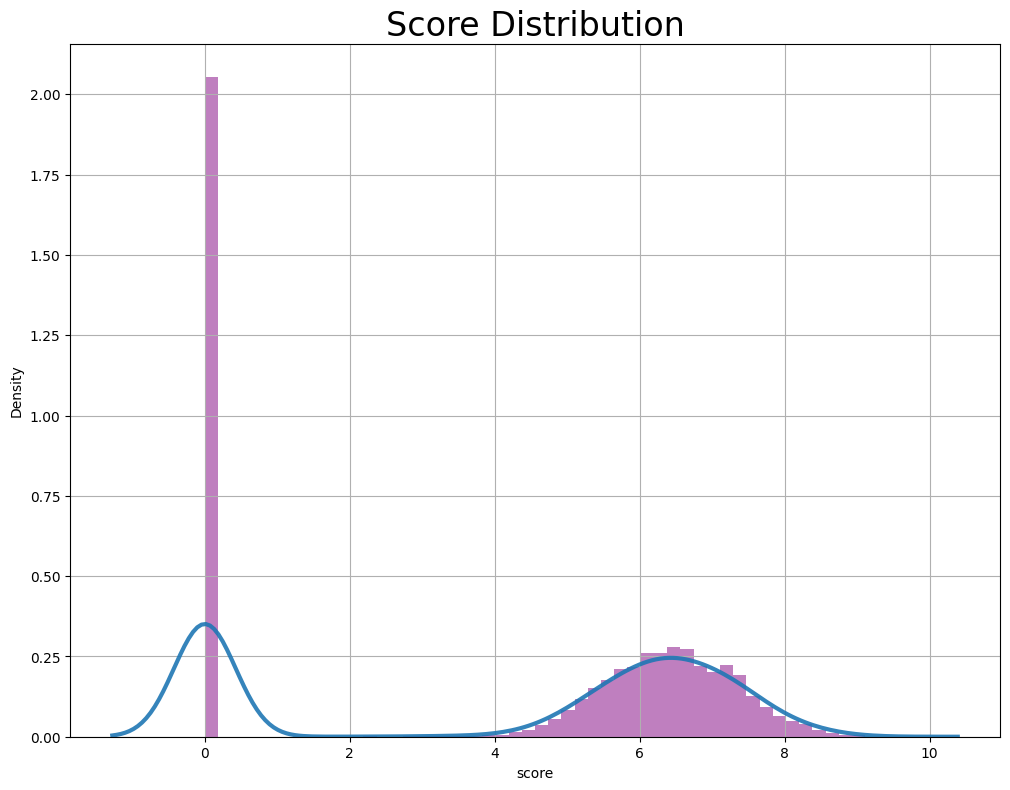

Average: 4.021732379549758


In [14]:
fig_kdeplot(anime_df, 'score', 'Score Distribution')
printAvg(anime_df, 'score')

In [15]:
anime_df_temp = anime_df.copy()
anime_df_temp.drop(anime_df_temp.loc[anime_df_temp['score']==0].index, inplace=True)

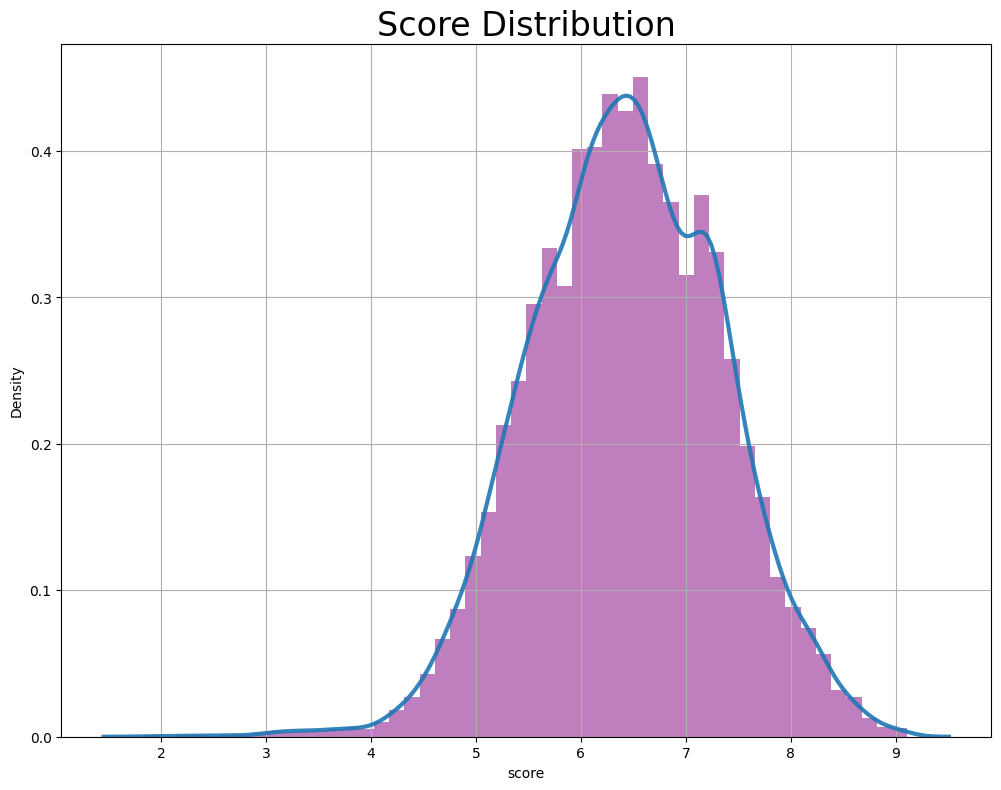

Average: 6.428334005918752


In [16]:
# score
fig_kdeplot(anime_df_temp, 'score', 'Score Distribution')
printAvg(anime_df_temp, 'score')

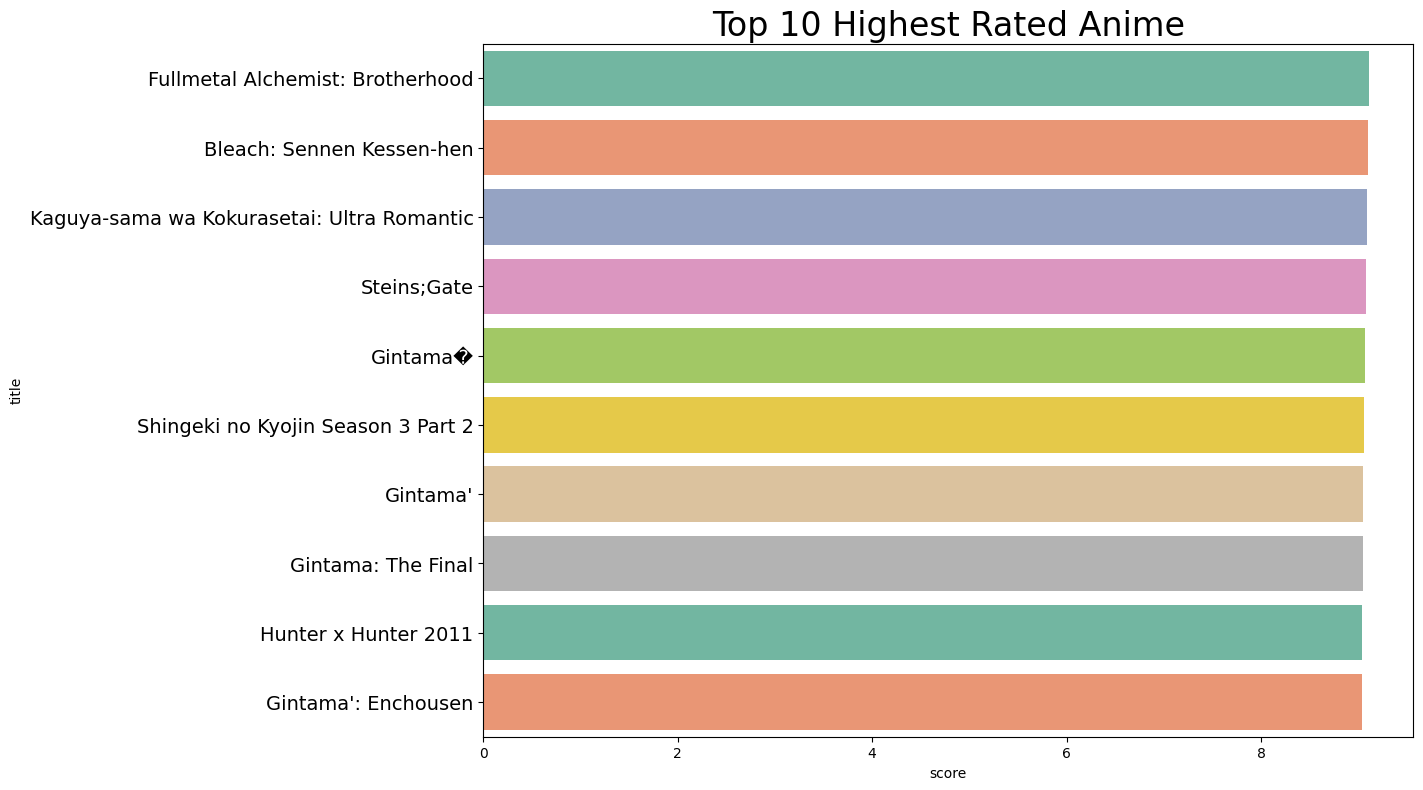

In [17]:
fig_topn_barplot(anime_df, 'title', 'score', 10, 'Top 10 Highest Rated Anime')

### rating_count

In [18]:
anime_df_temp = anime_df.copy()

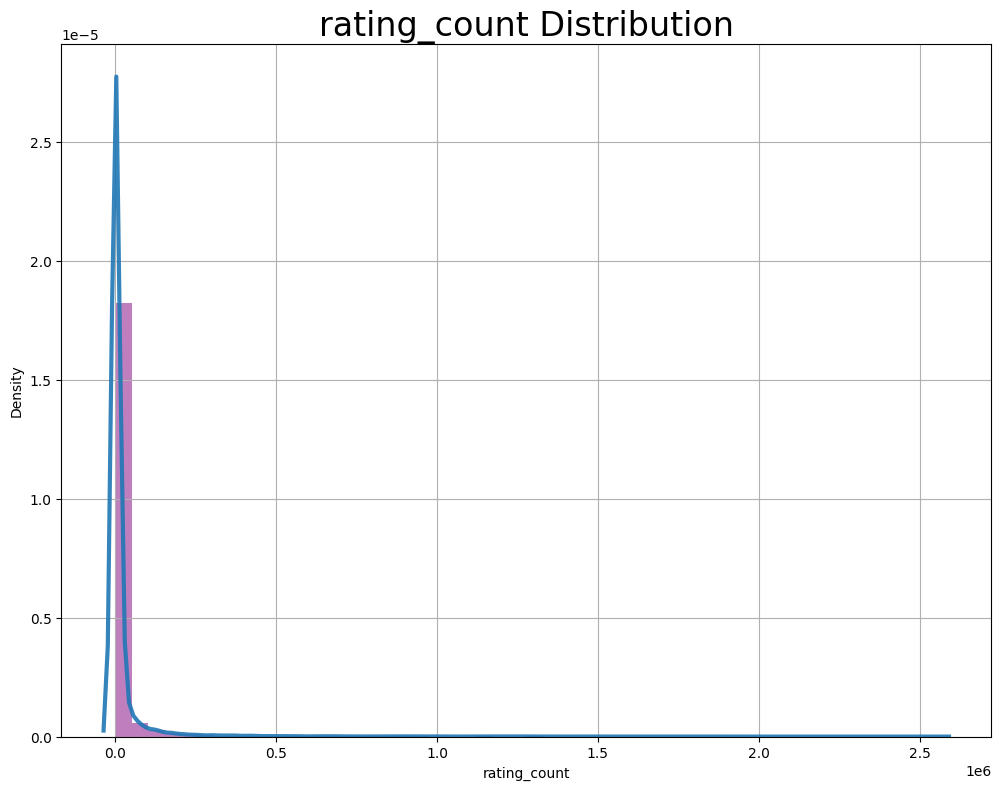

Average: 18645.255038922787


In [19]:
fig_kdeplot(anime_df, 'rating_count', 'rating_count Distribution')
printAvg(anime_df, 'rating_count')

In [20]:
anime_df_temp = anime_df.copy()
anime_df_temp.drop(anime_df_temp.loc[anime_df_temp['rating_count']==0].index, inplace=True)

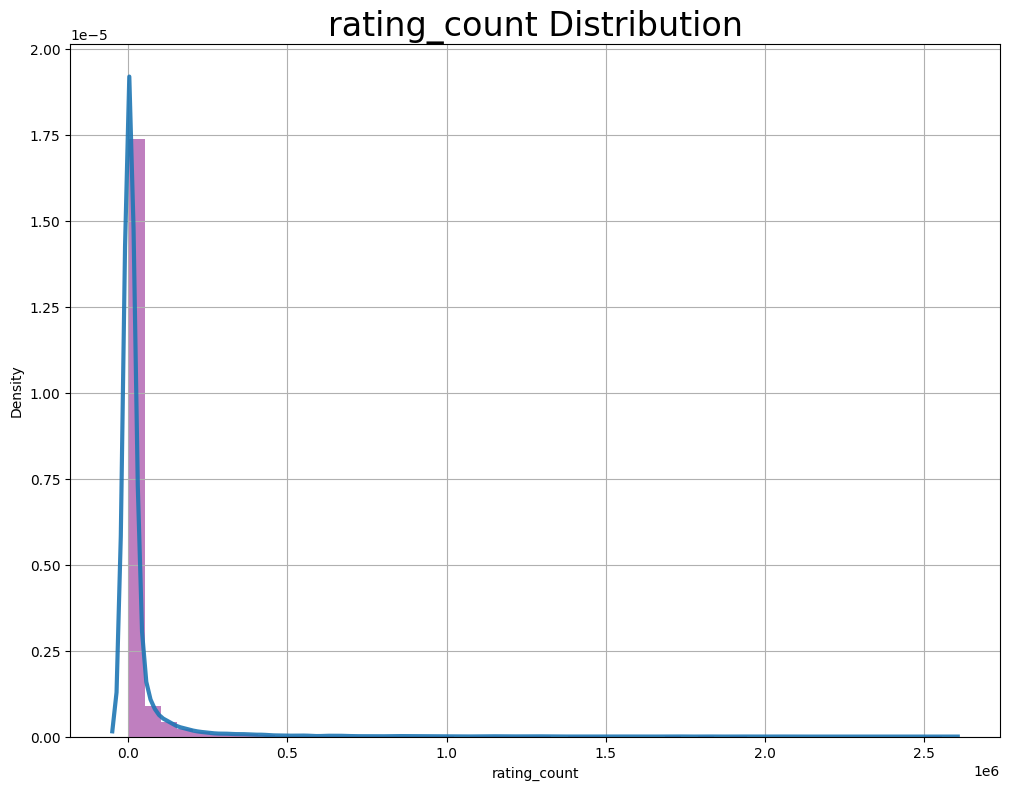

Average: 29802.561608824322


In [21]:
fig_kdeplot(anime_df_temp, 'rating_count', 'rating_count Distribution')
printAvg(anime_df_temp, 'rating_count')

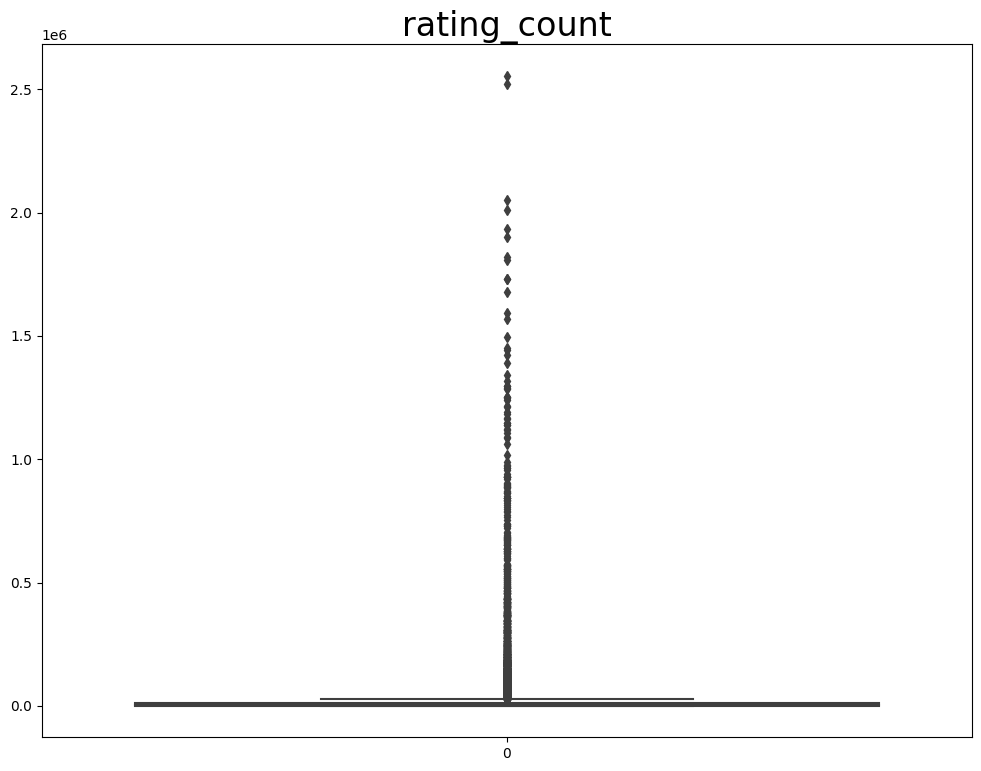

In [22]:
fig_boxplot(anime_df_temp, 'rating_count', 'rating_count')

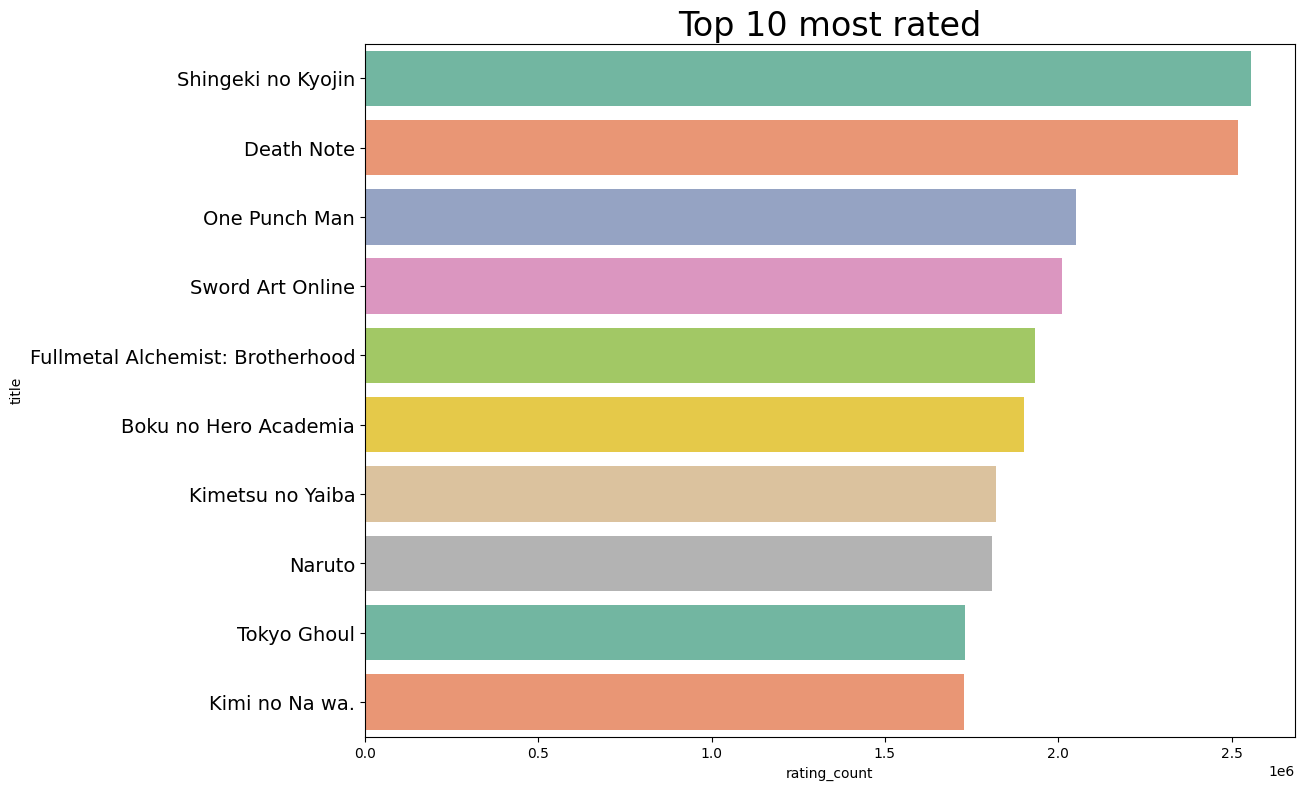

In [23]:
fig_topn_barplot(anime_df, 'title', 'rating_count', 10, 'Top 10 most rated')

### ranked

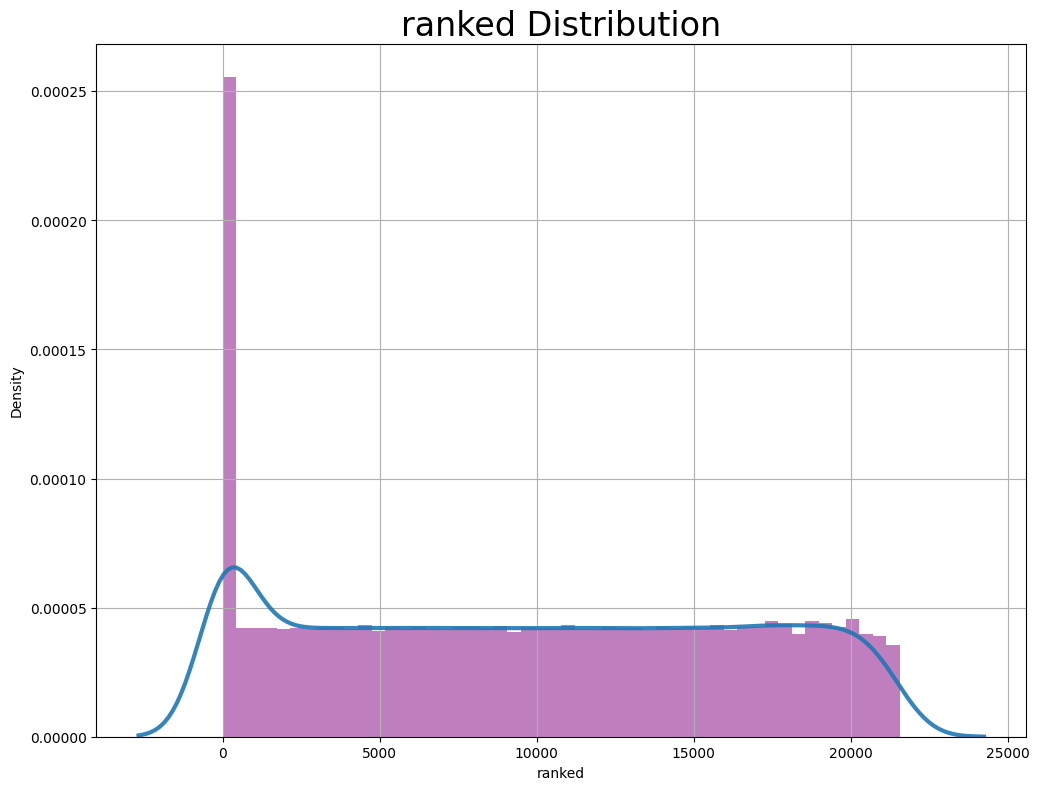

Average: 9779.09110035767


In [24]:
fig_kdeplot(anime_df, 'ranked', 'ranked Distribution')
printAvg(anime_df, 'ranked')

In [25]:
anime_df_temp = anime_df.copy()
anime_df_temp.drop(anime_df_temp.loc[anime_df_temp['ranked']<1].index, inplace=True)

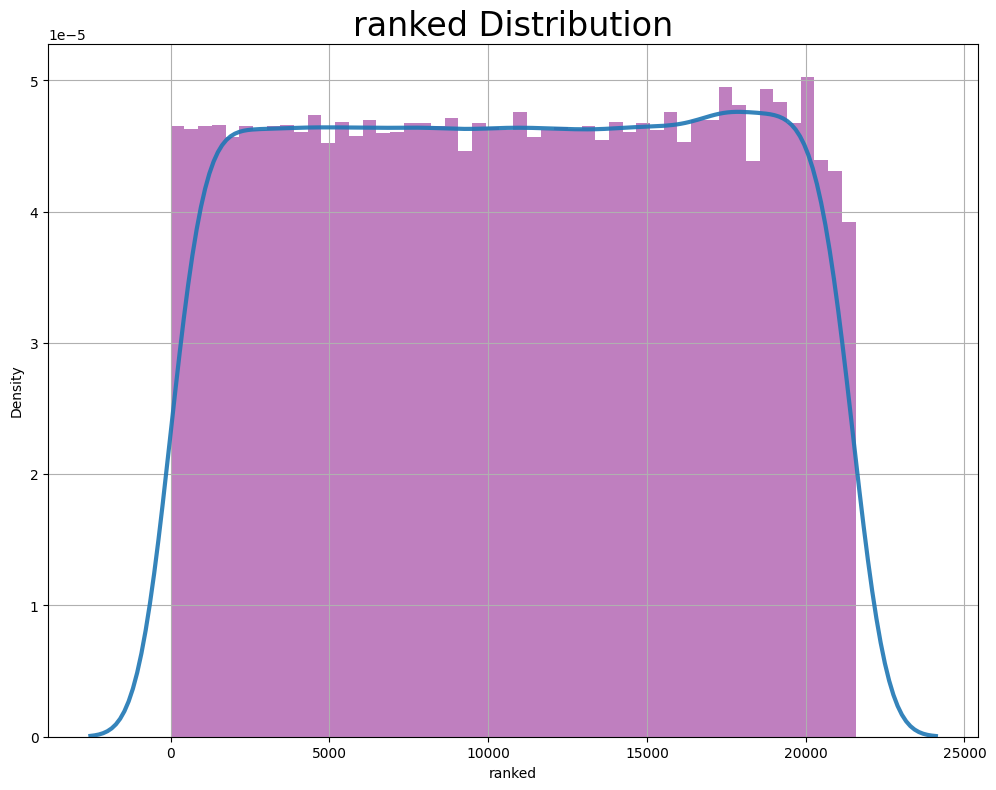

Average: 10770.732724660518


In [26]:
fig_kdeplot(anime_df_temp, 'ranked', 'ranked Distribution')
printAvg(anime_df_temp, 'ranked')

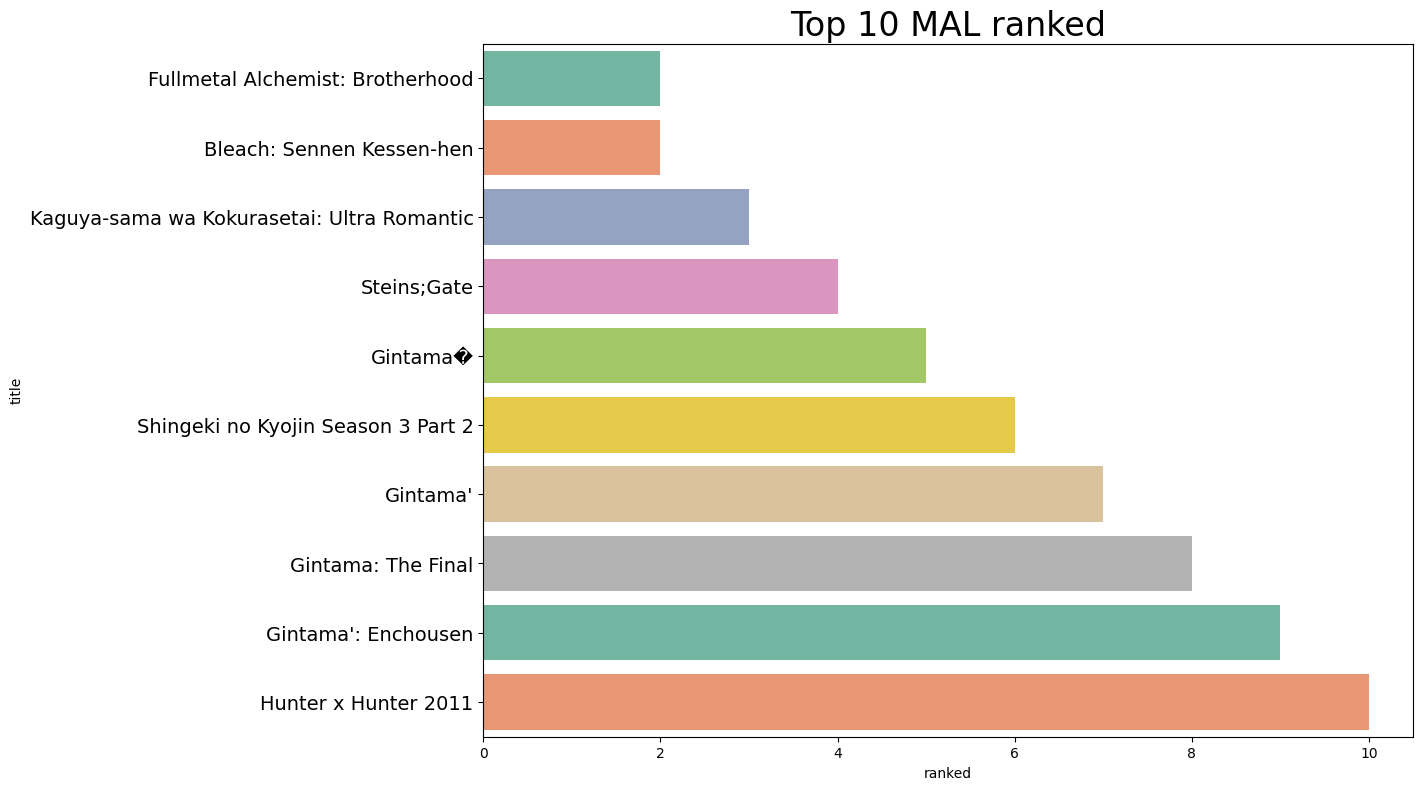

In [27]:
fig_topn_barplot_asc(anime_df_temp, 'title', 'ranked', 10, 'Top 10 MAL ranked')

### popularity

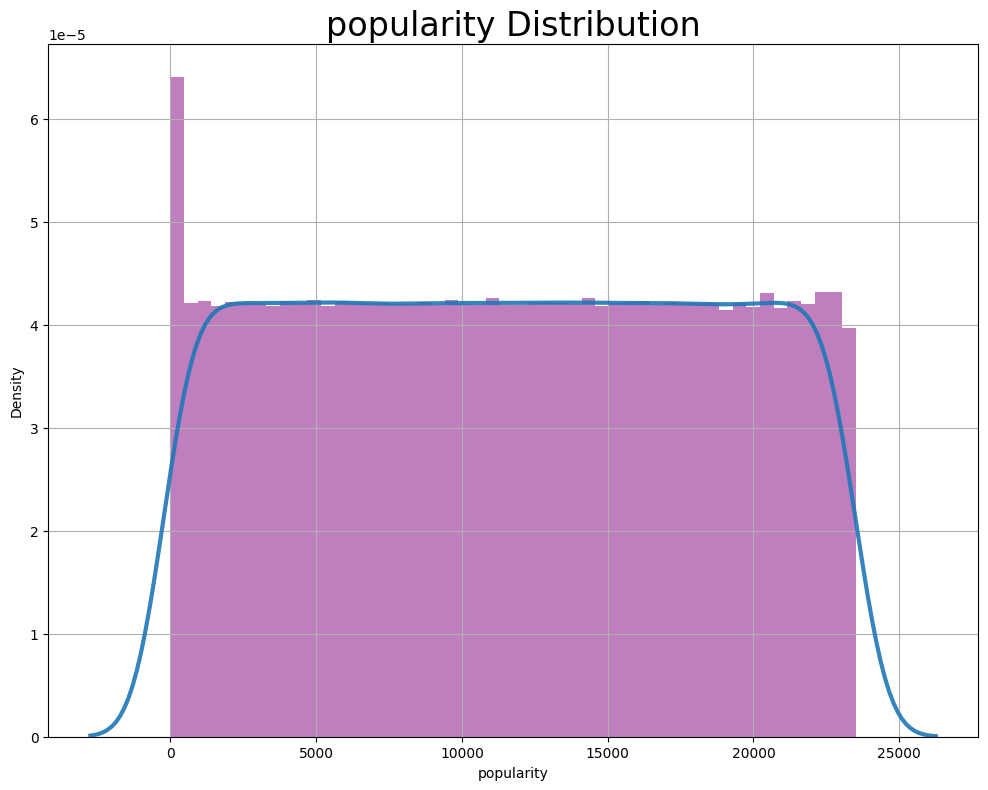

Average: 11633.09905322954


In [28]:
fig_kdeplot(anime_df, 'popularity', 'popularity Distribution')
printAvg(anime_df, 'popularity')

In [48]:
anime_df_temp = anime_df.copy()
anime_df_temp.drop(anime_df_temp.loc[anime_df_temp['popularity']<1].index, inplace=True)

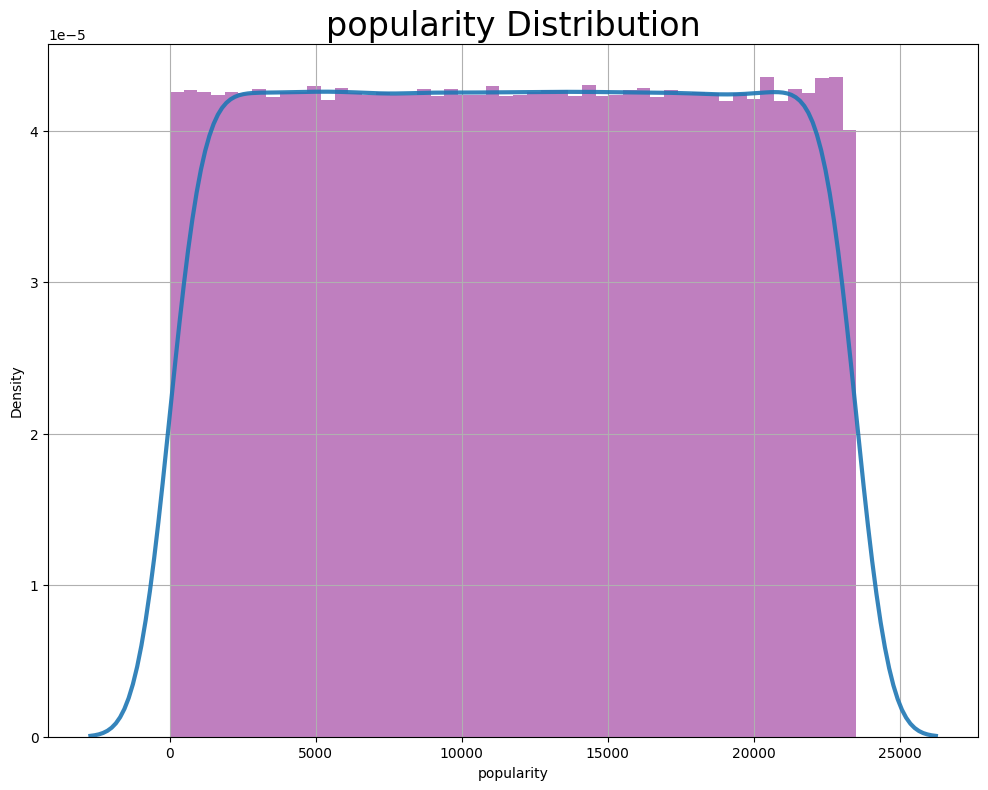

Average: 11754.776946298738


In [49]:
fig_kdeplot(anime_df_temp, 'popularity', 'popularity Distribution')
printAvg(anime_df_temp, 'popularity')

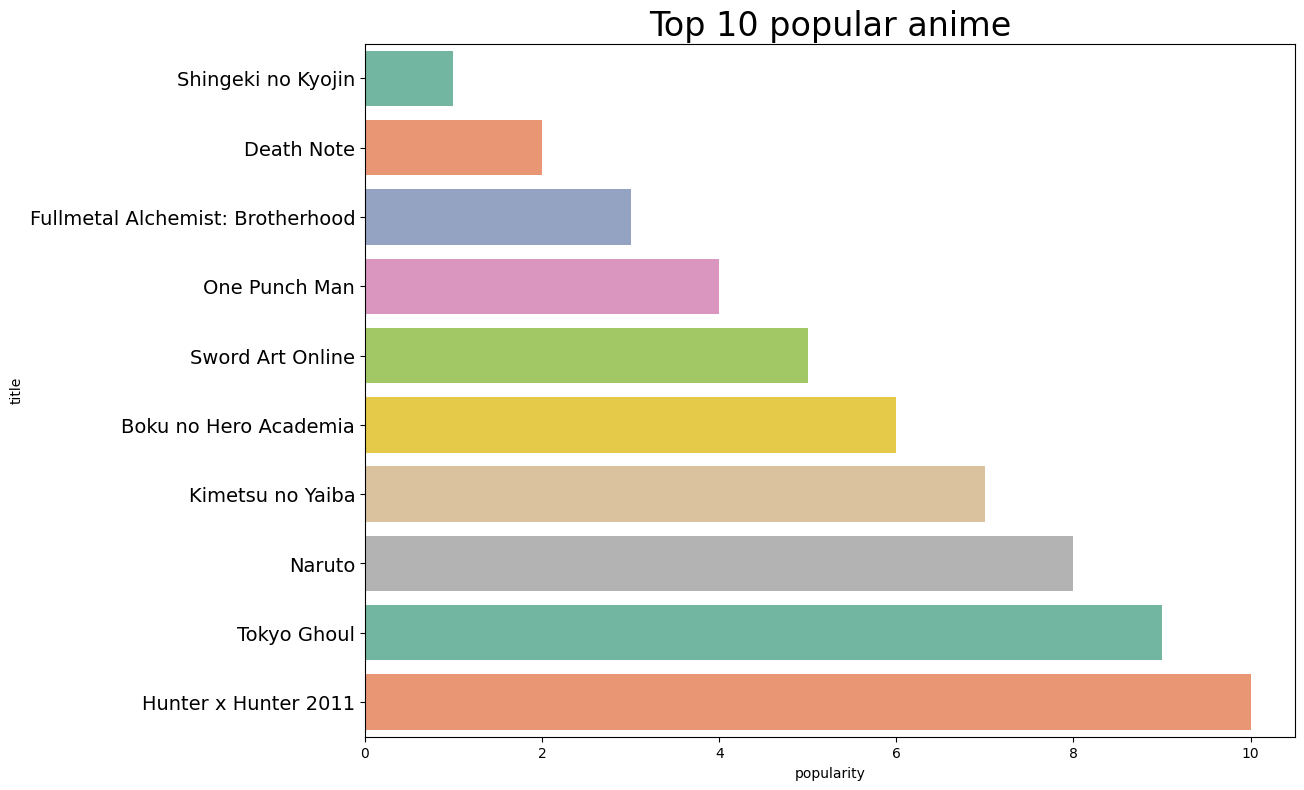

In [50]:
fig_topn_barplot_asc(anime_df_temp, 'title', 'popularity', 10, 'Top 10 popular anime')

### members

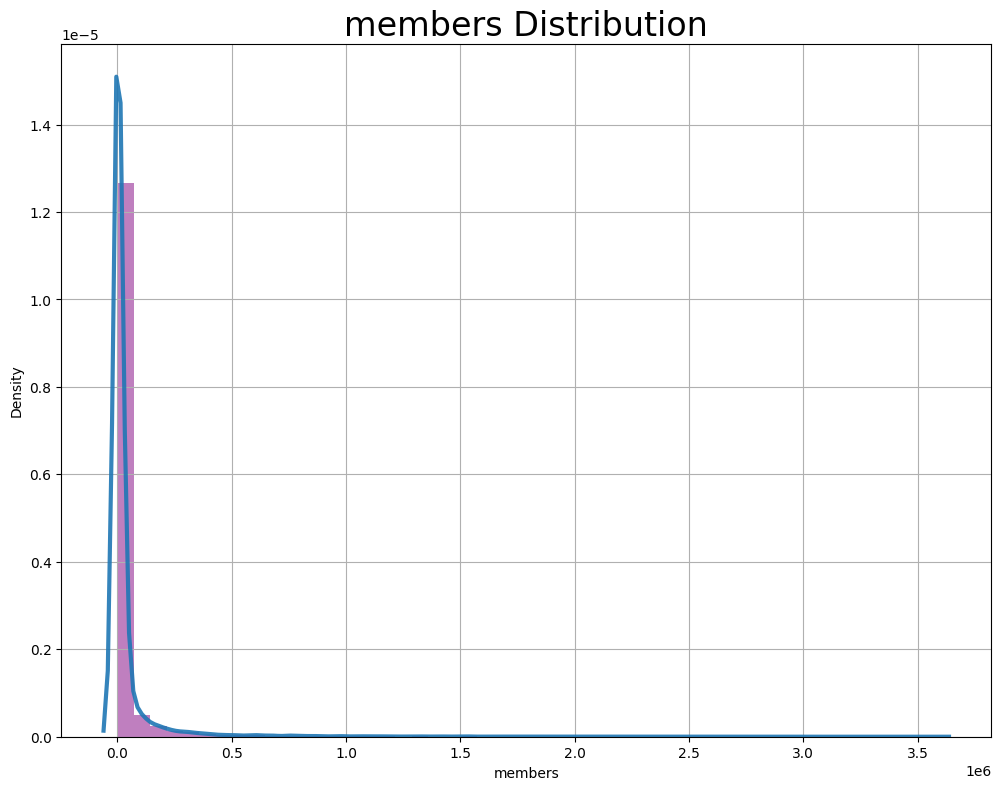

Average: 36309.43690300862


In [51]:
fig_kdeplot(anime_df, 'members', 'members Distribution')
printAvg(anime_df, 'members')

In [52]:
anime_df_temp = anime_df.copy()
anime_df_temp.drop(anime_df_temp.loc[anime_df_temp['members']==0].index, inplace=True)

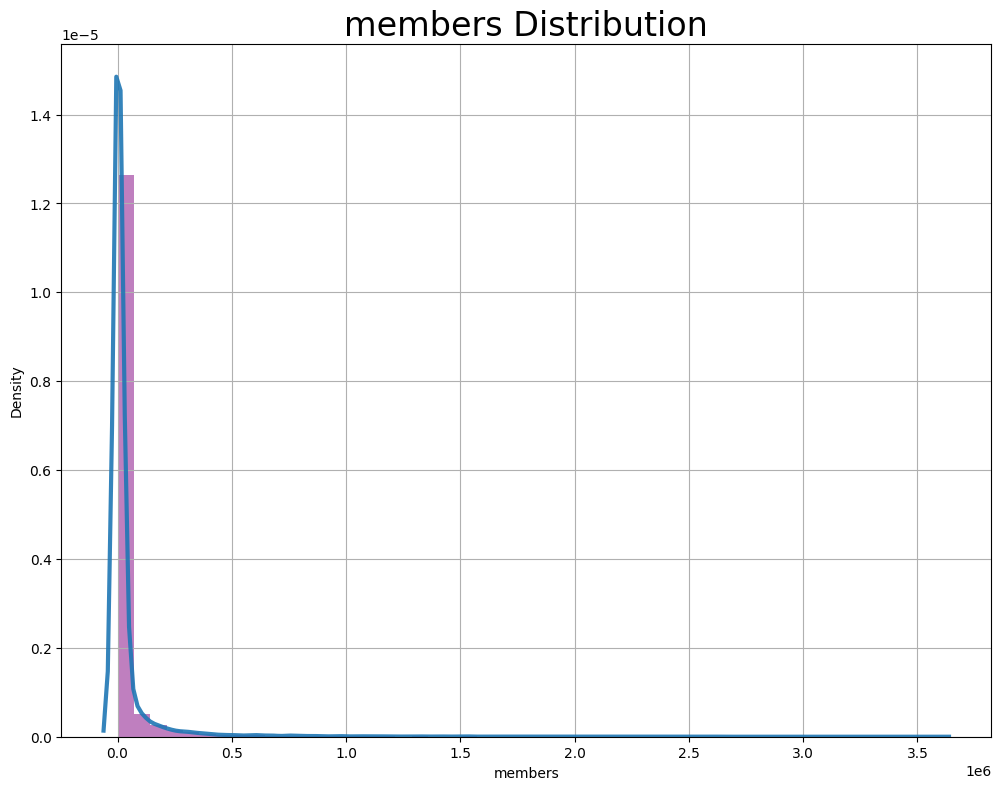

Average: 36695.461109929834


In [53]:
fig_kdeplot(anime_df_temp, 'members', 'members Distribution')
printAvg(anime_df_temp, 'members')

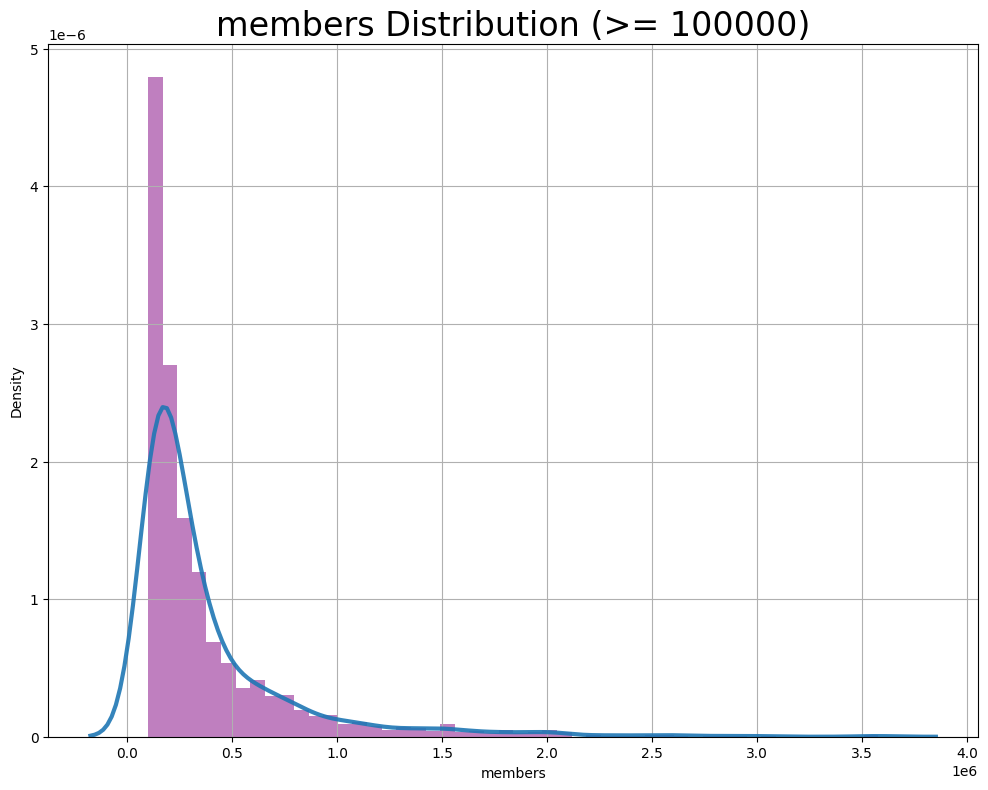

In [54]:
temp = anime_df_temp[['title', 'members']]
temp.drop(temp[temp['members'] < 100000].index, inplace=True)
fig_kdeplot(temp, 'members', 'members Distribution (>= 100000)')

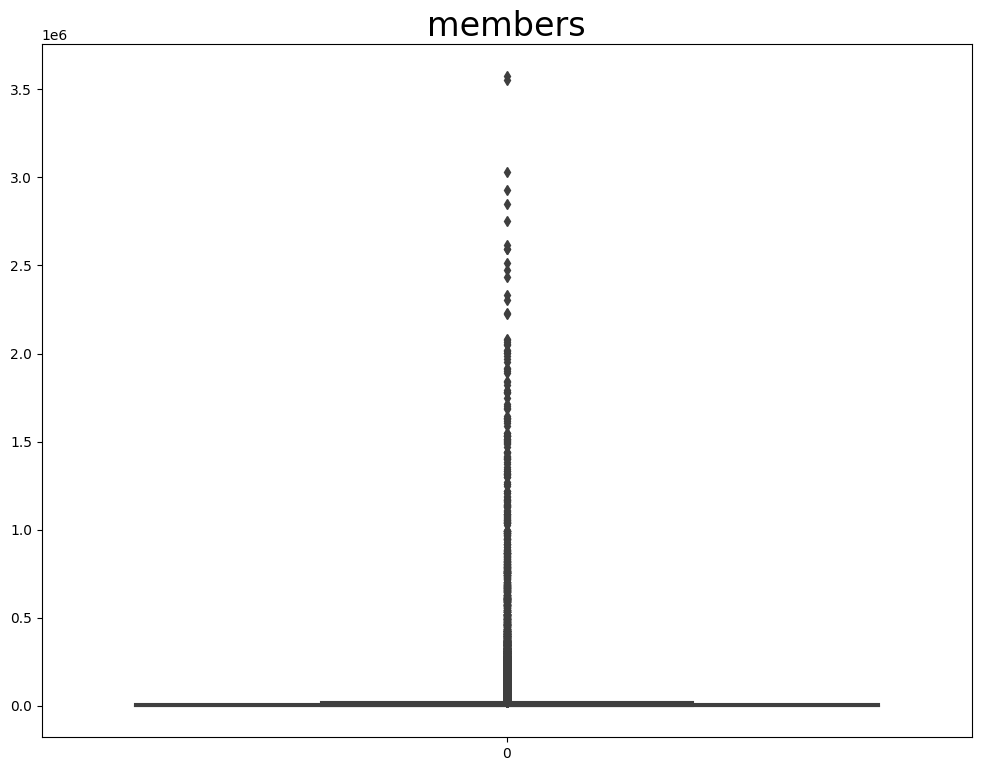

In [55]:
fig_boxplot(anime_df_temp, 'members', 'members')

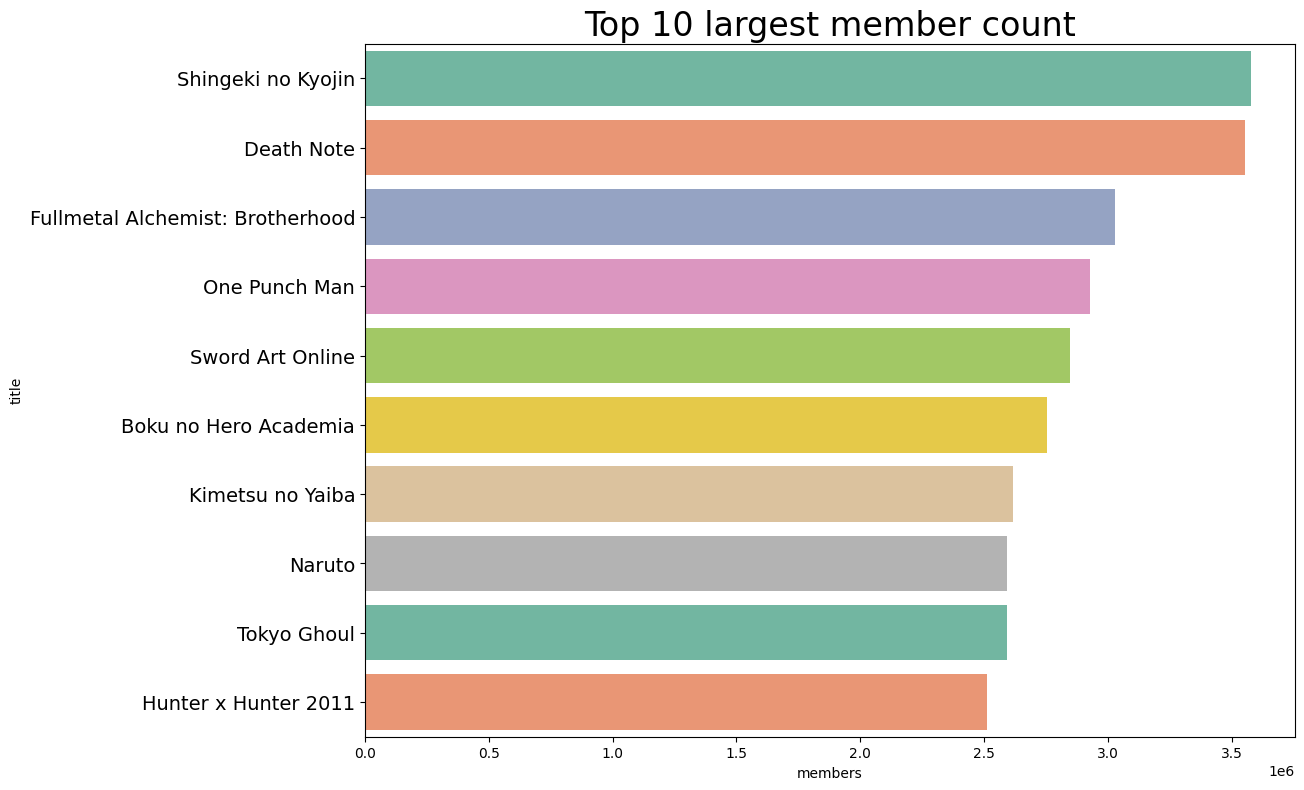

In [56]:
fig_topn_barplot(anime_df_temp, 'title', 'members', 10, 'Top 10 largest member count')

### type

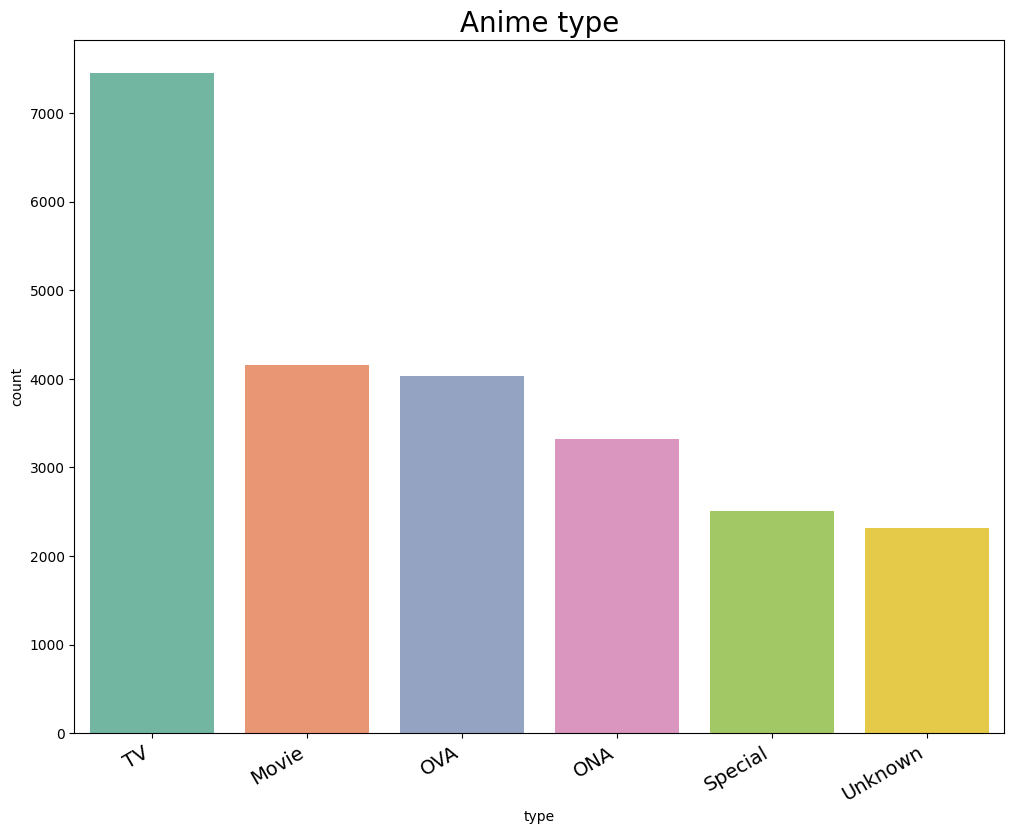

In [36]:
fig_countplot(anime_df, 'type', True, 'Anime type', True)

### studio

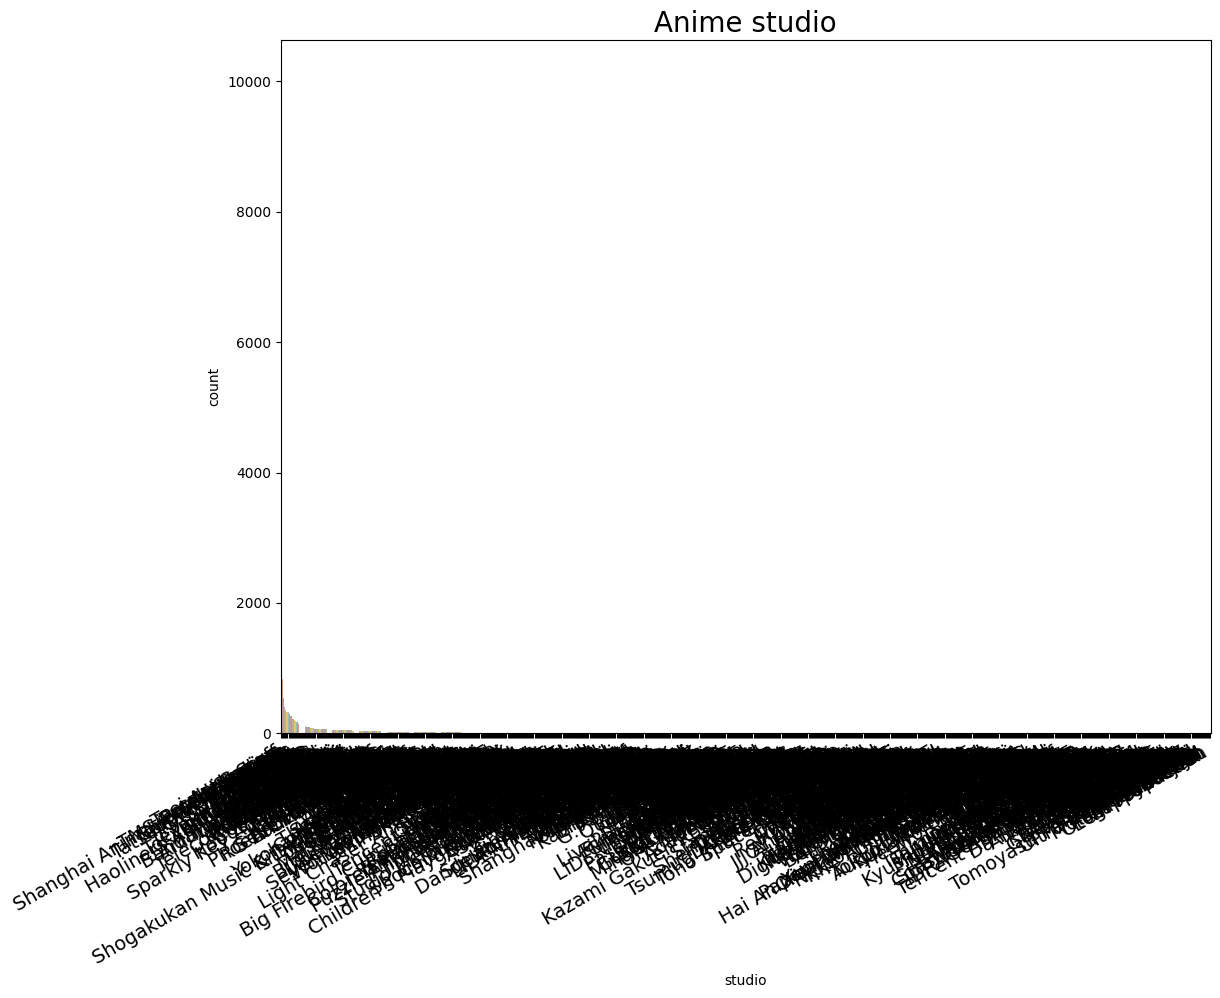

In [57]:
fig_countplot(anime_df, 'studio', True, 'Anime studio', True)

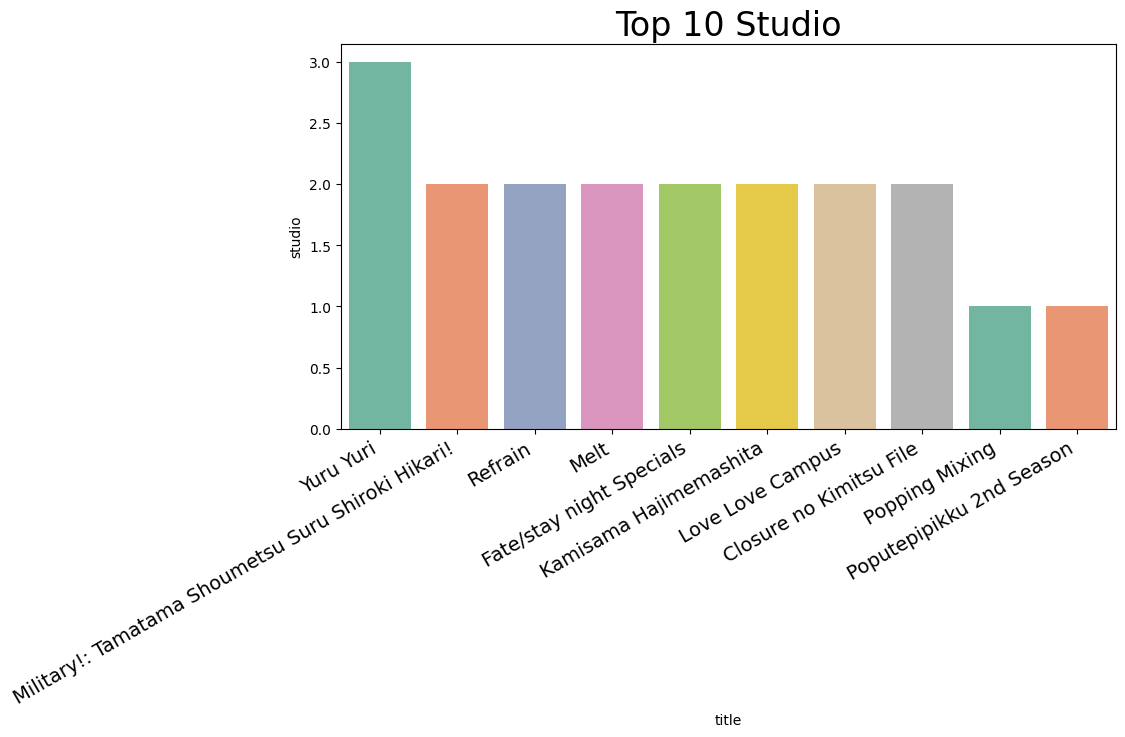

In [60]:
temp = pd.DataFrame(anime_df.groupby('studio')['studio'].count().sort_values(ascending=False))
temp = temp.reset_index().head(10)

fig = plt.figure(figsize=(10,5))
fig.set_facecolor('white')
ax = sns.barplot(data=temp, x='title', y='studio', palette='Set2')
ax.set_title('Top 10 Studio', fontsize=24)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=14)
plt.show()

### episode_count

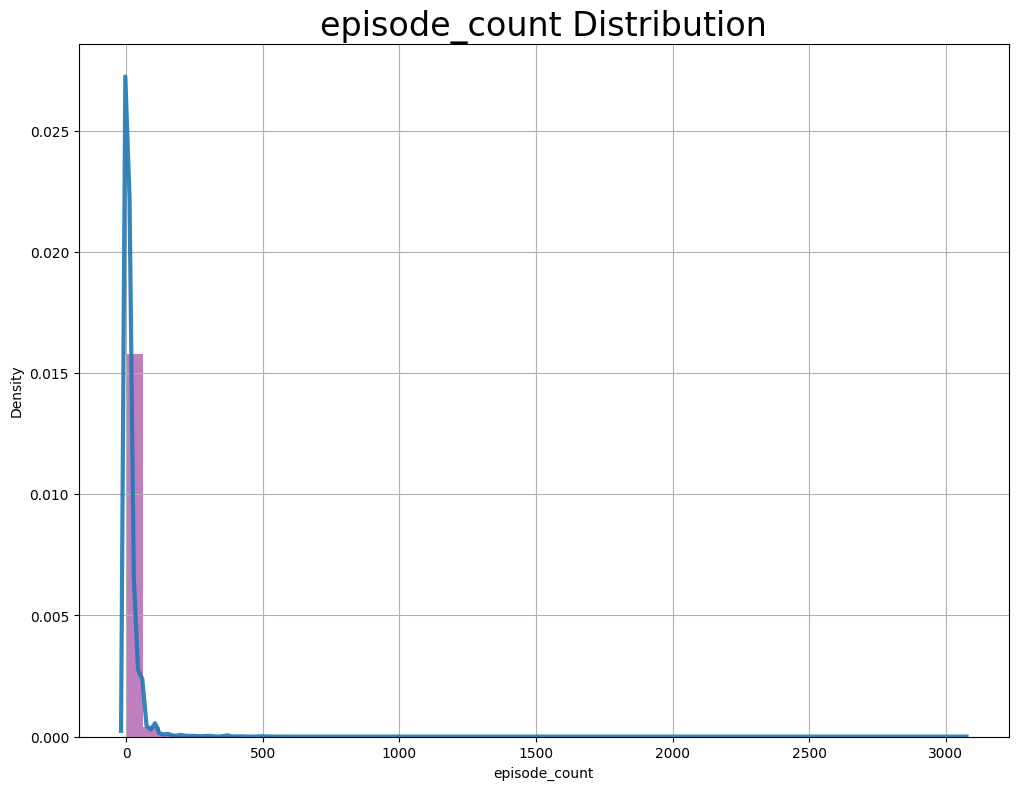

Average: 14.919966337050283


In [38]:
fig_kdeplot(anime_df, 'episode_count', 'episode_count Distribution')
printAvg(anime_df, 'episode_count')

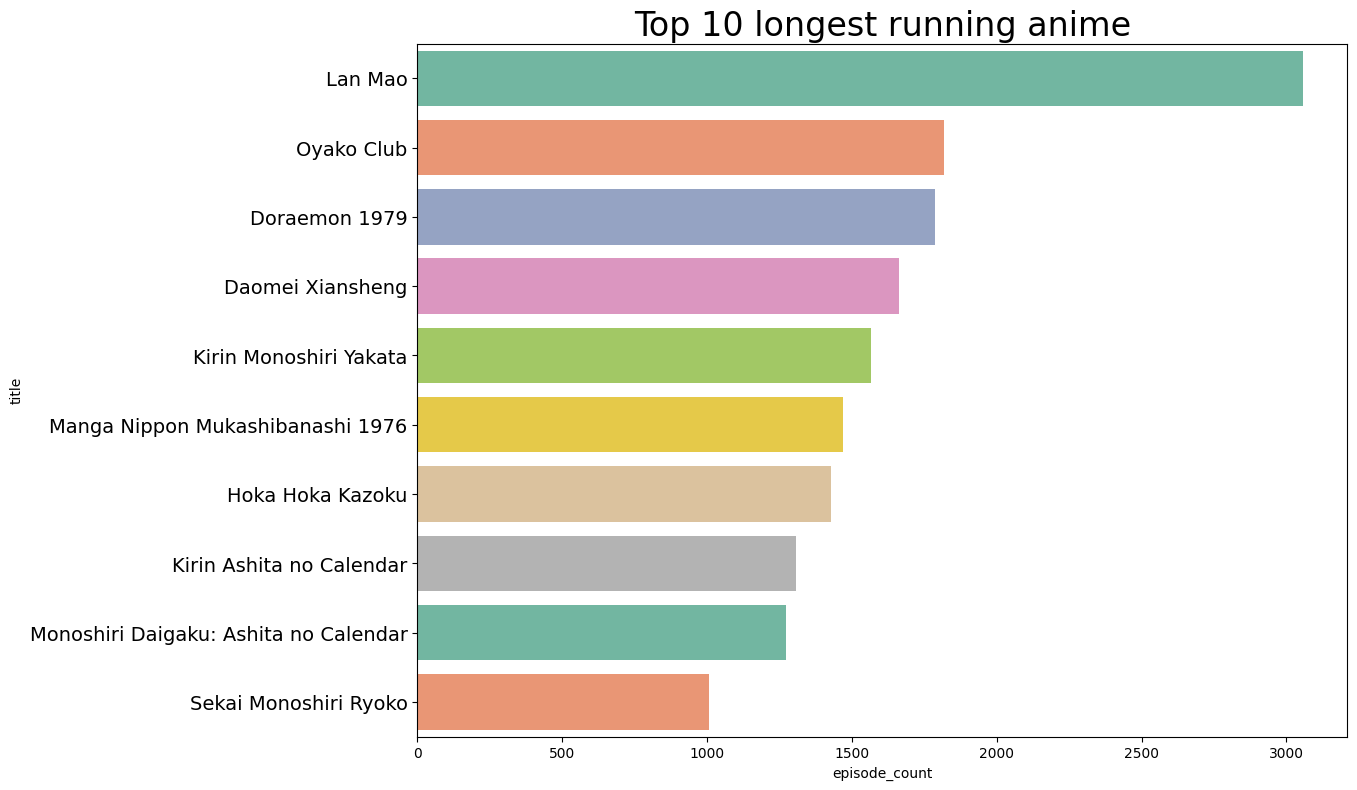

In [64]:
fig_topn_barplot(anime_df, 'title', 'episode_count', 10, 'Top 10 longest running anime')

In [39]:
anime_df_temp = anime_df.copy()
anime_df_temp.drop(anime_df_temp.loc[anime_df_temp['episode_count']==0].index, inplace=True)

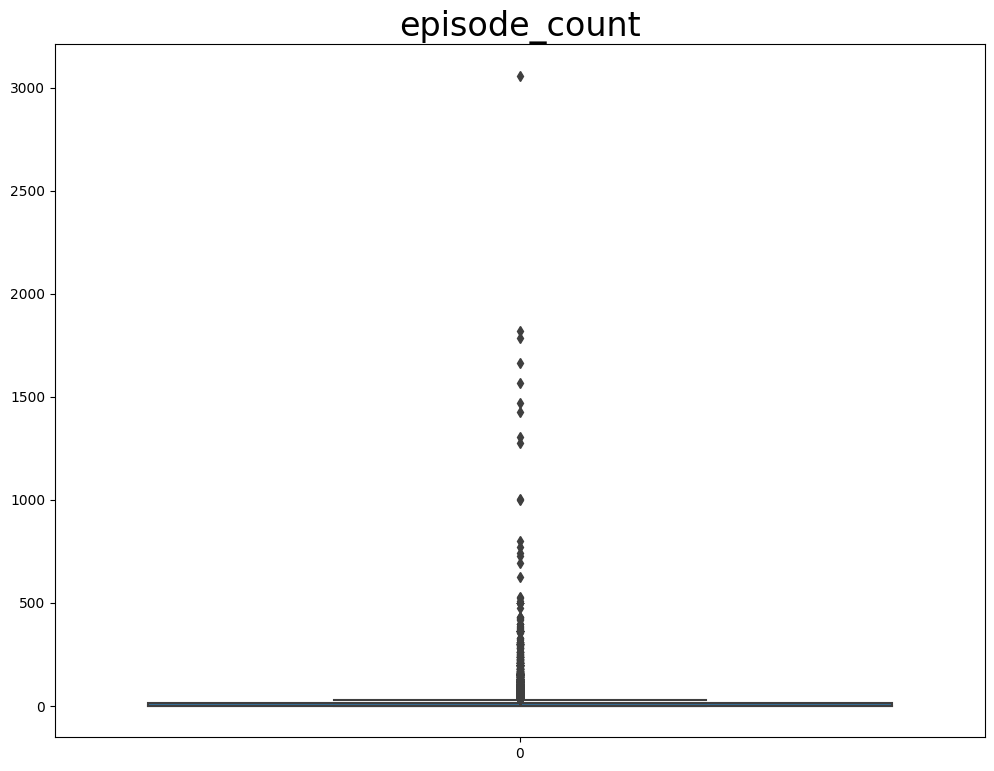

In [40]:
fig_boxplot(anime_df_temp, 'episode_count', 'episode_count')

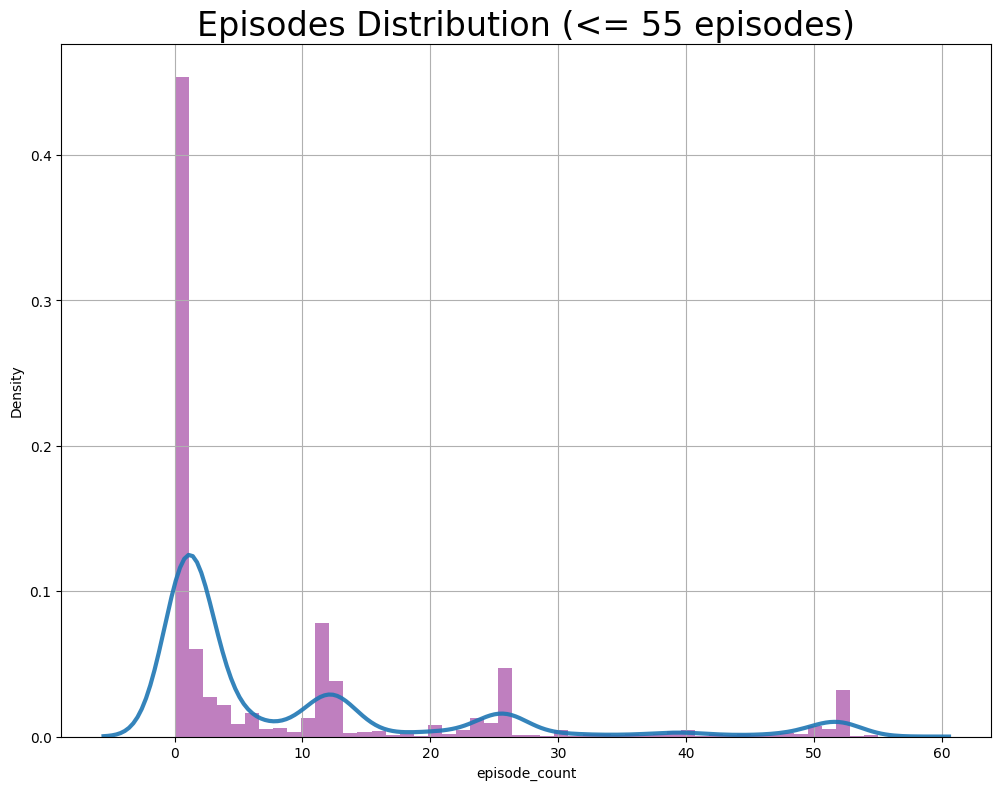

In [41]:
temp = anime_df[['title', 'episode_count']]
temp.drop(temp[temp['episode_count'] > 55].index, inplace=True)
fig_kdeplot(temp, 'episode_count', 'Episodes Distribution (<= 55 episodes)')

### genre

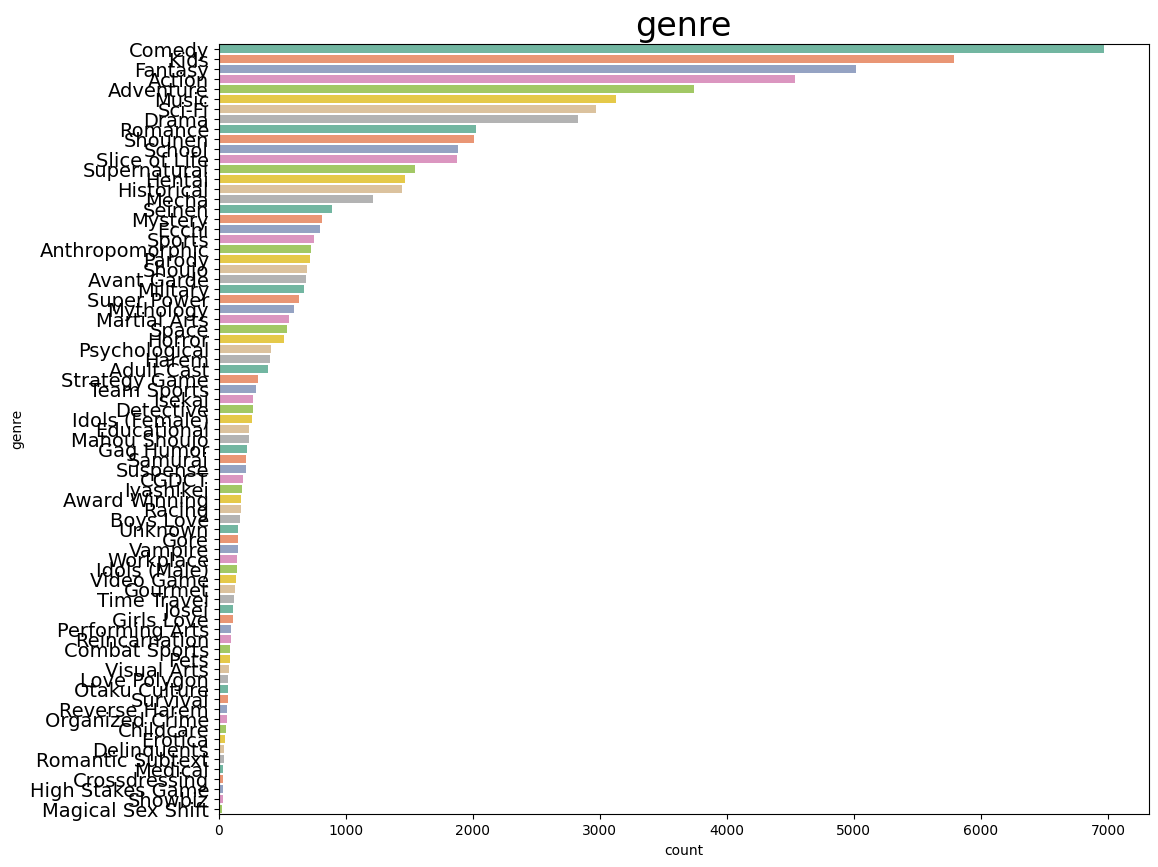

In [42]:
fig_comma_list(anime_df, 'genre', 'genre')